# Create a regression model using Multiple Linear Regression

### 1. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('kc_house_data.csv')
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,condition
0,221900.0,3,1.00,1180,5650,1.0,7,1180,0,1955,0,47.5112,-122.257,1340,5650,3
1,538000.0,3,2.25,2570,7242,2.0,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,3
2,180000.0,2,1.00,770,10000,1.0,6,770,0,1933,0,47.7379,-122.233,2720,8062,3
3,604000.0,4,3.00,1960,5000,1.0,7,1050,910,1965,0,47.5208,-122.393,1360,5000,5
4,510000.0,3,2.00,1680,8080,1.0,8,1680,0,1987,0,47.6168,-122.045,1800,7503,3


In [3]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,condition
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.401822e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,7.656873,1788.390691,291.509045,1971.005136,84.402258,47.560053,-122.213896,1986.552492,12768.455652,3.409430
std,3.673622e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,1.175459,828.090978,442.575043,29.373411,401.679240,0.138564,0.140828,685.391304,27304.179631,0.650743
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,47.155900,-122.519000,399.000000,651.000000,1.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,47.471000,-122.328000,1490.000000,5100.000000,3.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,7.000000,1560.000000,0.000000,1975.000000,0.000000,47.571800,-122.230000,1840.000000,7620.000000,3.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,47.678000,-122.125000,2360.000000,10083.000000,4.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,47.777600,-121.315000,6210.000000,871200.000000,5.000000


In [4]:
data.shape

(21613, 16)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   grade          21613 non-null  int64  
 7   sqft_above     21613 non-null  int64  
 8   sqft_basement  21613 non-null  int64  
 9   yr_built       21613 non-null  int64  
 10  yr_renovated   21613 non-null  int64  
 11  lat            21613 non-null  float64
 12  long           21613 non-null  float64
 13  sqft_living15  21613 non-null  int64  
 14  sqft_lot15     21613 non-null  int64  
 15  condition      21613 non-null  int64  
dtypes: float64(5), int64(11)
memory usage: 2.6 MB


array([[<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'bathrooms'}>,
        <AxesSubplot:title={'center':'sqft_living'}>],
       [<AxesSubplot:title={'center':'sqft_lot'}>,
        <AxesSubplot:title={'center':'floors'}>,
        <AxesSubplot:title={'center':'grade'}>,
        <AxesSubplot:title={'center':'sqft_above'}>],
       [<AxesSubplot:title={'center':'sqft_basement'}>,
        <AxesSubplot:title={'center':'yr_built'}>,
        <AxesSubplot:title={'center':'yr_renovated'}>,
        <AxesSubplot:title={'center':'lat'}>],
       [<AxesSubplot:title={'center':'long'}>,
        <AxesSubplot:title={'center':'sqft_living15'}>,
        <AxesSubplot:title={'center':'sqft_lot15'}>,
        <AxesSubplot:title={'center':'condition'}>]], dtype=object)

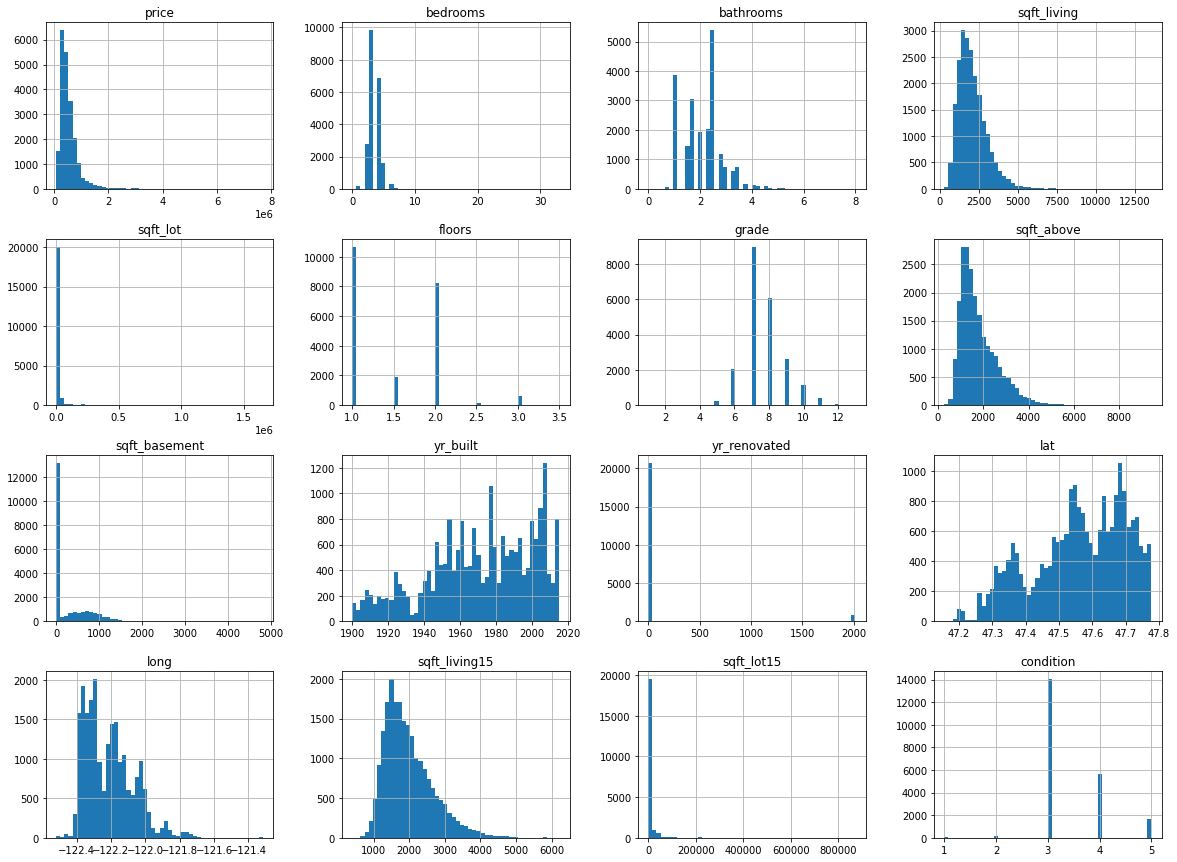

In [6]:
data.hist(figsize=(20,15),bins=50)

### 2.

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [8]:
def pred(model, X):
    return model.predict(X)
def rms(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))
def accuracy(model, X, y):
    return model.score(X, y)

In [9]:
scaler = StandardScaler()

In [10]:
train_set,test_set=train_test_split(data, test_size=0.2, random_state=42)

In [11]:
train_set.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,condition
6325,325000.0,3,1.75,1780,13095,1.0,9,1780,0,1983,0,47.3670,-122.152,2750,13095,4
13473,257000.0,2,1.00,1000,3700,1.0,6,800,200,1929,0,47.5520,-122.290,1270,5000,3
17614,228500.0,3,1.00,1080,7486,1.5,6,990,90,1942,0,47.4838,-122.335,1170,7800,3
16970,288000.0,3,2.25,2090,7500,1.0,7,1280,810,1977,0,47.3951,-122.172,1800,7350,4
20868,479000.0,2,2.50,1741,1439,2.0,8,1446,295,2007,0,47.7043,-122.209,2090,10454,3


In [12]:
X_train_set = train_set.drop('price', axis=1)
y_train_set = train_set['price'].copy()
X_test_set = test_set.drop('price', axis=1)
y_test_set = test_set['price'].copy()

In [13]:
X_train_set_prep = pd.DataFrame(scaler.fit_transform(X_train_set), columns=X_train_set.columns)
X_test_set_prep = pd.DataFrame(scaler.fit_transform(X_test_set), columns=X_test_set.columns)

In [14]:
lin_reg = LinearRegression()

In [15]:
lin_model = lin_reg.fit(X_train_set_prep, y_train_set)

In [16]:
print("predition:", lin_model.predict(X_train_set.iloc[:5]))
print("depart:", y_train_set.iloc[:5])

predition: [1.67133182e+08 1.63448899e+07 2.42796196e+07 1.75714667e+08
 9.93557405e+07]
depart: 6325     325000.0
13473    257000.0
17614    228500.0
16970    288000.0
20868    479000.0
Name: price, dtype: float64


In [17]:
y_train_pred = pred(lin_model, X_train_set_prep)
acc = rms(y_train_set, y_train_pred)
acc

211018.5483885013

In [18]:
y_test_pred = pred(lin_model, X_test_set)
acc = rms(y_test_set, y_test_pred)
acc

296719031.8474932

In [19]:
sco = accuracy(lin_reg, X_test_set_prep, y_test_set)
sco

0.6513445674521187

# Create a regression model using Decision Tree Regression

In [20]:
from sklearn.tree import DecisionTreeRegressor

In [21]:
tree_reg = DecisionTreeRegressor()
tree_model = tree_reg.fit(X_train_set, y_train_set)

In [22]:
y_train_pred_1 = pred(tree_model, X_train_set)
acc = rms(y_train_set, y_train_pred_1)
acc

9995.189125787769

In [23]:
y_test_pred_1 = pred(tree_model, X_test_set)
acc = rms(y_test_set, y_test_pred_1)
acc

224362.080118412

In [24]:
sco = accuracy(tree_reg, X_test_set, y_test_set)
sco

0.6674147421877954

In [25]:
from sklearn.ensemble import RandomForestRegressor

In [26]:
rf_reg = RandomForestRegressor()
rf_model = rf_reg.fit(X_train_set, y_train_set)
score = rf_reg.score(X_test_set, y_test_set)
score

0.8235714215628168

In [27]:
y_train_pred_2 = pred(rf_model, X_train_set)
acc = rms(y_train_set, y_train_pred_2)
acc

52980.137334883795

In [28]:
y_test_pred_2 = pred(rf_model, X_test_set)
acc = rms(y_test_set, y_test_pred_2)
acc

163411.42900901425

# Create a regression model using Neural Networks

In [31]:
from tensorflow import keras

In [42]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train_set, y_train_set)

In [45]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu",input_shape=X_train_set.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer="sgd")
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_valid, y_valid))

Epoch 1/50
406/406 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 2/50
406/406 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 3/50
406/406 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 4/50
406/406 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 5/50
406/406 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 6/50
406/406 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 7/50
406/406 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 8/50
406/406 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 9/50
406/406 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 10/50
406/406 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 11/50
406/406 [==============================] - 1s 2

In [39]:
mse_test = model.evaluate(X_test_set_prep, y_test_set)
mse_test

136/136 [==============================] - 0s 816us/step - loss: nan


nan